# Instructions:

Please answer the following questions as thoroughly as possible to produce correct output and to clearly interpret the results if the question asks for it.

## Question 1 (50 points)

### Import neccessary libraries:

In [1]:
#Answer Here

In [80]:
import pandas as pd

### Load the dataset as excel 'titanic.xls'

In [81]:
#Answer Here

In [82]:
df = pd.read_excel(r'C:\Users\gbisnik\Downloads\titanic.xlsx')

### Show the head of the dataframe and briefly explain the data

In [83]:
#Answer Here

In [84]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Return some info on the data and briefly explain what the categories mean

In [85]:
#Answer here

### 'Describe' the main statistical features of the data

In [86]:
#Answer here
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Include 50% to 100% percentile with 5% increments for the 'age' column in the describe method output

In [87]:
#Answer here
df['age'].describe(percentiles=[.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
50%        28.000000
55%        30.000000
60%        31.000000
65%        33.000000
70%        36.000000
75%        39.000000
80%        42.000000
85%        45.000000
90%        50.000000
95%        57.000000
100%       80.000000
max        80.000000
Name: age, dtype: float64

### What is the 80% percentile of the 'age' column?

In [88]:
#Answer here
#df['age'].describe(percentiles=[.8])
df.age.quantile(.8)

42.0

### Create a sub dataframe where the age of passengers is above the 80% percentile calculated above

In [89]:
#Answer here
df2=df[df.age > df.age.quantile(.8)]
print(df2)


      pclass  survived                                           name     sex  \
5          1         1                            Anderson, Mr. Harry    male   
6          1         1              Andrews, Miss. Kornelia Theodosia  female   
8          1         1  Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9          1         0                        Artagaveytia, Mr. Ramon    male   
10         1         0                         Astor, Col. John Jacob    male   
...      ...       ...                                            ...     ...   
1261       3         1                         Turkula, Mrs. (Hedwig)  female   
1272       3         0                    Vander Cruyssen, Mr. Victor    male   
1287       3         0               Widegren, Mr. Carl/Charles Peter    male   
1290       3         1               Wilkes, Mrs. James (Ellen Needs)  female   
1301       3         0                           Youseff, Mr. Gerious    male   

       age  sibsp  parch   

### Count the number of passengers in first class

In [90]:
#Answer here
df[df.pclass==1].shape[0]

323

### Create a new column called 'older than 90% percentile' where it's true/false if the passenger is older/younger than the 90% percentile

In [91]:
#Answer here
x=df.age.quantile(.9)
print(x)
df['older than 90% percentile']= pd.NaT
df.loc[df['age'] > x, 'older than 90% percentile'] = 'True'
df.loc[df['age'] < x, 'older than 90% percentile'] = 'False'
print(df[['age','older than 90% percentile']])


50.0
          age older than 90% percentile
0     29.0000                     False
1      0.9167                     False
2      2.0000                     False
3     30.0000                     False
4     25.0000                     False
...       ...                       ...
1304  14.5000                     False
1305      NaN                       NaT
1306  26.5000                     False
1307  27.0000                     False
1308  29.0000                     False

[1309 rows x 2 columns]


### Group the 'fare' column by the class of passenger and get the mean fare price for each class

In [92]:
df.groupby('pclass')['fare'].mean()

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

### Plot the bar chart for the avg fare grouped by class

<AxesSubplot:title={'center':'Avg Class Fare'}, xlabel='Class', ylabel='Avg Fare'>

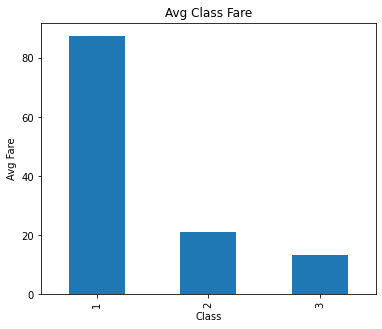

In [93]:
#Answer here
df3=df.groupby('pclass')['fare'].mean()
df3.plot(kind='bar', title='Avg Class Fare', ylabel='Avg Fare',
         xlabel='Class', figsize=(6, 5))

### Getting the number of outliers: define the upper bound and lower bound for the 'fare' column at 95% or 5% and count how many passengers are considered outliers

In [214]:
#Answer here
import numpy as np
u_bound=df.fare.quantile(.95)
l_bound=df.fare.quantile(.05)
#np.sum((df.fare > u_bound) | (df.fare > l_bound))
subset_df=df[(df.fare > u_bound) | (df.fare < l_bound)]
print("number of outlier passengers=", subset_df.shape[0])



number of outlier passengers= 101


### Replace outliers in the dataframe by the mean of the 'fare' column

In [215]:
#Answer here


In [216]:
mean_fare=df.fare.mean()
df['fare']=np.where((df.fare > u_bound) | (df.fare < l_bound),mean_fare,df['fare'])
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,21.025309,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,11.559307,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,7.750000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,9.500000,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,22.858792,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,26.550000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,56.929200,328.000000


## Question 2 (50 points)

### Load the contents of 'titanic2.csv', look at the head of the data for its structure and combine it with the previous dataframe

In [217]:
#Answer here
new_df = pd.read_excel(r'C:\Users\gbisnik\Downloads\titanic2.xlsx')

In [218]:
#Anaswer here
print(new_df.head())

   pclass  survived                                     name     sex   age  \
0       3         1  Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0   
1       3         0                     Youseff, Mr. Gerious    male  45.5   
2       3         0                        Yousif, Mr. Wazli    male   NaN   
3       3         0                    Yousseff, Mr. Gerious    male   NaN   
4       3         0                     Zabour, Miss. Hileni  female  14.5   

   sibsp  parch  ticket     fare  cabin embarked  boat   body  home.dest  
0      1      0    2659  14.4542    NaN        C   NaN    NaN        NaN  
1      0      0    2628   7.2250    NaN        C   NaN  312.0        NaN  
2      0      0    2647   7.2250    NaN        C   NaN    NaN        NaN  
3      0      0    2627  14.4583    NaN        C   NaN    NaN        NaN  
4      1      0    2665  14.4542    NaN        C   NaN  328.0        NaN  


In [219]:
merged_df=df.append(new_df,ignore_index=True)
print(merged_df)

      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1313       3         0                             Zabour, Miss. Hileni   
1314       3         0                            Zabour, Miss. Thamine   
1315       3         0                        Zakarian, Mr. Mapriededer   
1316       3         0                              Zakarian, Mr. Ortin   
1317       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket       fare    cabin embarked boat  \
0     female  29.0

### Plot a scatter plot of 'age' vs 'fare' for your data and calculate the correlation between these two columns

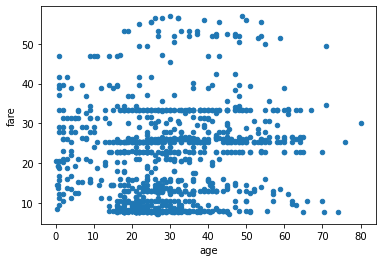

In [220]:
#Answer here
ax1 = merged_df.plot.scatter(x='age',y='fare', style='o')


In [221]:
#Answer here
correlation = merged_df['age'].corr(merged_df['fare'])
print(correlation)

0.14030202460004576


### Drop 'name', 'cabin', 'boat', 'body','home.dest', 'embarked', 'ticket' columns

In [222]:
#Answer here
merged_df.drop(['name', 'cabin', 'boat', 'body','home.dest', 'embarked', 'ticket'],axis=1, inplace=True)
list(merged_df.columns)

['pclass',
 'survived',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'older than 90% percentile']

# Filling missing data in 'age' column by using an educated guess:

### Write a function that takes two columns, 'age' and 'pclass', as input and depending on which pclass, if the age is NaN (command: pd.isnull(age)   ) it returns age 40, 30 or 25. For example, if input is [NaN, 1], it returns age = 40

In [223]:
#Answer here
def guess_age(age, pclass):
        if pd.isnull(age) or age is None:
            if pclass==1:
                return 40
            elif pclass==2:
                return 30
            elif pclass==3:
                return 25
        else: return age

### Use apply to clean up age database for NaN using the function created above

In [224]:
#Answer here
merged_df['age']=merged_df[['age','pclass']].apply(lambda x: guess_age(*x), axis=1)


In [225]:
print(merged_df['age'])

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1313    14.5000
1314    25.0000
1315    26.5000
1316    27.0000
1317    29.0000
Name: age, Length: 1318, dtype: float64


### In the 'fare' column, isolate and display the row where there is NaN

In [226]:
#Answer here
subset_df=merged_df[merged_df['fare'].isna()]
print(subset_df)

      pclass  survived   sex   age  sibsp  parch  fare  \
1225       3         0  male  60.5      0      0   NaN   

     older than 90% percentile  
1225                      True  


### Using apply fuction, convert the data in 'sex' column to zeros and ones: if female, replace by 1, otherwise by 0

In [227]:
#Answer here

merged_df['sex']=merged_df['sex'].apply(lambda a:1 if a=='female' else 0)


### Display the top rows for 'sex' column

In [228]:
#Answer here
merged_df['sex'].head(10)


0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: sex, dtype: int64

### Confirm that the contents of the 'sex' column are integers by showing the type of one content (zero's index, first, etc) or using the info command

In [229]:
#Answer here
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pclass                     1318 non-null   int64  
 1   survived                   1318 non-null   int64  
 2   sex                        1318 non-null   int64  
 3   age                        1318 non-null   float64
 4   sibsp                      1318 non-null   int64  
 5   parch                      1318 non-null   int64  
 6   fare                       1317 non-null   float64
 7   older than 90% percentile  1031 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 82.5+ KB
None


### In 'fare' column, replace NaN with the mean of the column

In [230]:
#Answer here
merged_df['fare'].fillna(value=df['fare'].mean(), inplace=True)

### Drop any leftover NaN in the dataframe

In [232]:
#Answer here
merged_df.dropna()

,pclass,survived,sex,age,sibsp,parch,fare,older than 90% percentile
0,1,1,1,29.0000,0,0,33.295479,False
1,1,1,0,0.9167,1,2,33.295479,False
2,1,0,1,2.0000,1,2,33.295479,False
3,1,0,0,30.0000,1,2,33.295479,False
4,1,0,1,25.0000,1,2,33.295479,False
...,...,...,...,...,...,...,...,...
1301,3,0,0,45.5000,0,0,25.363241,False
1304,3,0,1,14.5000,1,0,14.454200,False
1306,3,0,0,26.5000,0,0,25.363241,False
1307,3,0,0,27.0000,0,0,25.363241,False


### Display the head of cleaned dataframe

In [233]:
#Answer here
merged_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,older than 90% percentile
0,1,1,1,29.0000,0,0,33.295479,False
1,1,1,0,0.9167,1,2,33.295479,False
2,1,0,1,2.0000,1,2,33.295479,False
3,1,0,0,30.0000,1,2,33.295479,False
4,1,0,1,25.0000,1,2,33.295479,False


# QED!